In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 3 of Set 1 | arica
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | roebourne
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | westerland
Processing Record 8 of Set 1 | witu
Processing Record 9 of Set 1 | toledo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | caraballeda
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | burica
City not found. Skipping...
Processing Record 16 of Set 1 | bogotol
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | s

Processing Record 35 of Set 4 | sorong
Processing Record 36 of Set 4 | kodiak
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | plettenberg bay
Processing Record 40 of Set 4 | kankakee
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | nizhneangarsk
Processing Record 43 of Set 4 | fuyang
Processing Record 44 of Set 4 | katangli
Processing Record 45 of Set 4 | changping
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | gornyy
Processing Record 49 of Set 4 | sivas
Processing Record 50 of Set 4 | leshukonskoye
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | manggar
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | linares
Processing Record 7 of Set 5 | griffith
Processing Record 8 

Processing Record 27 of Set 8 | escanaba
Processing Record 28 of Set 8 | tibiri
Processing Record 29 of Set 8 | buloh kasap
Processing Record 30 of Set 8 | camana
Processing Record 31 of Set 8 | tianpeng
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | akureyri
Processing Record 34 of Set 8 | san jeronimo
Processing Record 35 of Set 8 | mecca
Processing Record 36 of Set 8 | rio cuarto
Processing Record 37 of Set 8 | oksfjord
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | leon
Processing Record 42 of Set 8 | kemijarvi
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | hobyo
Processing Record 45 of Set 8 | tokat
Processing Record 46 of Set 8 | kirakira
Processing Record 47 of Set 8 | lagoa
Processing Record 48 of Set 8 | shakawe
Processing Record 49 of Set 8 | korampallam
Processing Record 50 of Set 8 | ambilobe
Processing Record 1 of Set 9 |

Processing Record 16 of Set 12 | mandera
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | port hedland
Processing Record 19 of Set 12 | novoagansk
Processing Record 20 of Set 12 | mabaruma
Processing Record 21 of Set 12 | kampene
Processing Record 22 of Set 12 | kiruna
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | chenzhou
Processing Record 26 of Set 12 | turukhansk
Processing Record 27 of Set 12 | sande
Processing Record 28 of Set 12 | akyab
Processing Record 29 of Set 12 | beringovskiy
Processing Record 30 of Set 12 | middelburg
Processing Record 31 of Set 12 | uwayl
City not found. Skipping...
Processing Record 32 of Set 12 | deputatskiy
Processing Record 33 of Set 12 | makat
Processing Record 34 of Set 12 | saleaula
City not found. Skipping...
Processing Record 35 of Set 12 | sinnamary
Processing Record 36 of Set 12 | yatou
Processing Record 37 of Set 12 | williams lake
Processing Record

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,82.04,33,40,12.55,AU,2022-02-03 23:37:51
1,Arica,-18.4750,-70.3042,74.75,68,0,5.75,CL,2022-02-03 23:37:52
2,Hithadhoo,-0.6000,73.0833,81.21,72,90,8.86,MV,2022-02-03 23:37:53
3,Roebourne,-20.7833,117.1333,87.57,52,53,9.44,AU,2022-02-03 23:37:53
4,Ponta Do Sol,32.6667,-17.1000,66.00,79,48,4.54,PT,2022-02-03 23:37:54
5,Westerland,54.9079,8.3033,43.18,100,100,14.97,DE,2022-02-03 23:37:54
6,Witu,-2.3889,40.4382,78.96,95,94,3.89,KE,2022-02-03 23:37:55
7,Toledo,39.8333,-4.0000,54.09,71,99,5.64,ES,2022-02-03 23:37:55
8,Albany,42.6001,-73.9662,41.31,92,100,1.99,US,2022-02-03 23:37:56
9,Caraballeda,10.6112,-66.8522,80.67,69,75,5.75,VE,2022-02-03 23:37:56


In [11]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,40,AU,2022-02-03 23:37:51,33,-33.6500,115.3333,82.04,12.55
1,Arica,0,CL,2022-02-03 23:37:52,68,-18.4750,-70.3042,74.75,5.75
2,Hithadhoo,90,MV,2022-02-03 23:37:53,72,-0.6000,73.0833,81.21,8.86
3,Roebourne,53,AU,2022-02-03 23:37:53,52,-20.7833,117.1333,87.57,9.44
4,Ponta Do Sol,48,PT,2022-02-03 23:37:54,79,32.6667,-17.1000,66.00,4.54
5,Westerland,100,DE,2022-02-03 23:37:54,100,54.9079,8.3033,43.18,14.97
6,Witu,94,KE,2022-02-03 23:37:55,95,-2.3889,40.4382,78.96,3.89
7,Toledo,99,ES,2022-02-03 23:37:55,71,39.8333,-4.0000,54.09,5.64
8,Albany,100,US,2022-02-03 23:37:56,92,42.6001,-73.9662,41.31,1.99
9,Caraballeda,75,VE,2022-02-03 23:37:56,69,10.6112,-66.8522,80.67,5.75


In [12]:
# Create the output file (CSV).
output_data_file = "C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

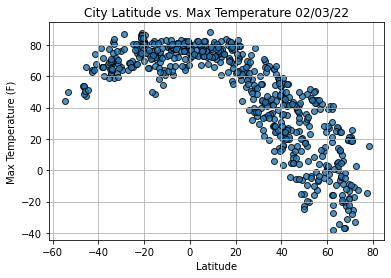

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

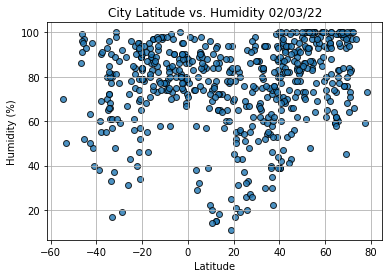

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

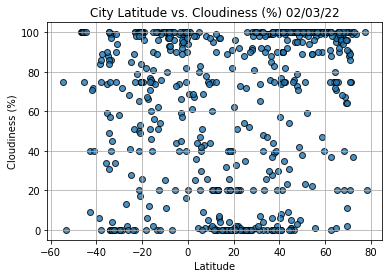

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

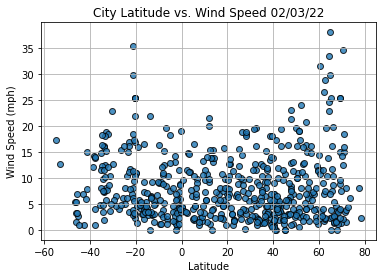

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

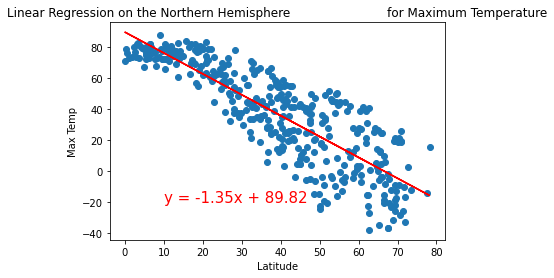

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

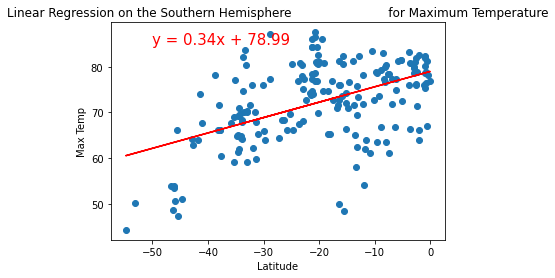

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))